In [1]:
import numpy as np
import nibabel as nib
import scipy.io as sio
from scipy import stats
import pandas as pd
import h5py
import nilearn
from nilearn import plotting
from math import pi
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

/Users/austin/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
##### load a bp and list of components. 
#### we're only using the blueprints in this notebook

def load_data(mat):
    ### load text list of components
    mat=h5py.File(mat,'r')
    variables=mat.items()
    for var in variables:
        mat_name=var[0]
        mat_data=var[1]
        mat_data=np.array(mat_data).transpose()
        mat_data=mat_data
    return mat_data

In [3]:
#### load all that data
L_pig_data=load_data('./blueprints/L_pig27.mat')
L_hum_data=load_data('./blueprints/L_hum27.mat')
R_pig_data=load_data('./blueprints/R_pig27.mat')
R_hum_data=load_data('./blueprints/R_hum27.mat')


In [4]:
#### let's load all the structures in the blueprints
with open('./blueprints/structureList.txt') as structs:
    structs=structs.read().split('\n')
    structs=[s.replace('_',' ') for s in structs]
structs.pop()

''

In [5]:
def get_fp(rois,bp):
    ##### find non zero vertices for each ROI
    if type(rois)==int:
        print('single vertex figerprint')
        fp=np.zeros(bp.shape[1])
        fp=bp[rois,:]
    else:
        for i in range(len(rois)):     
            rois[i]=nib.load(rois[i])
            rois[i]=[x.data for x in rois[i].darrays]
            rois[i]=rois[i][0]
            rois[i]=rois[i]>0
        #### extract mean connections of each ROI
            fp=np.zeros((len(rois),bp.shape[1]))
            st=np.zeros((len(rois),bp.shape[1]))
        for i in range(0,len(rois)):
            fp[i,:]=np.mean(bp[rois[i]==True,:],axis=0)
            st[i,:]=np.std(bp[rois[i]==True,:],axis=0)
    return [fp,st]
    fp=np.zeros((len(rois),bp.shape[1]))
    

In [6]:
 #function to normalize rows of blueprints. allows for plotting as well as calculating the KL 
def normalize(BP):
    p=BP.shape
    p=BP[0]
    BP[(np.isnan(BP))]=0
    row_sums=BP.sum(axis=1)
    BP=BP/row_sums[:,np.newaxis]
    return BP

In [7]:
####### normalize the blueprints
LH=normalize(L_hum_data)
LP=normalize(L_pig_data)
RH=normalize(R_hum_data)
RP=normalize(R_pig_data)

In [8]:
### mask out the subcortex

LHsub_cort=nilearn.surface.load_surf_data('surfaces/labels/L.hum.subcort.label')
LH[LHsub_cort]=float('NaN')
LPsubcort=nilearn.surface.load_surf_data('surfaces/labels/L.pig.subcort.label')
LP[LPsubcort]=float('NaN')

RHsub_cort=nilearn.surface.load_surf_data('surfaces/labels/R.hum.subcort.label')
RH[RHsub_cort]=float('NaN')
RPsubcort=nilearn.surface.load_surf_data('surfaces/labels/R.pig.subcort.label')
RP[RPsubcort]=float('NaN')


In [9]:
### whole cortex fingerprint
LH=np.nanmean(LH,axis=0)
RH=np.nanmean(RH,axis=0)
LP=np.nanmean(LP,axis=0)
RP=np.nanmean(RP,axis=0)

In [10]:
new=structs.copy()
quita=['mcp','fma','fmi']
# fma=structs[10]
# fmi=structs[11]
# mcp=structs[18]
# left=structs[0::2]
# right=structs[1::2]

for idx in quita: new.remove(idx)
left=new[0::2]

left=left[::-1]

right=new[1::2]
type(quita[0:1])
new=quita[0:1]+right+quita[1:3] + left

res = [structs.index(i) for i in new] 



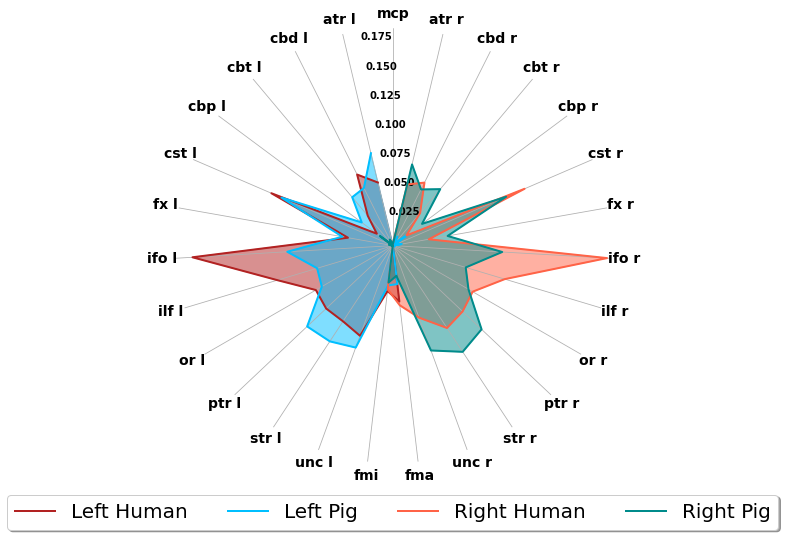

In [11]:

#### fancy polar plot 
plt.figure(figsize=(8,8))
N=len(new)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
tracts=plt.xticks(angles[:-1],new,size=14,fontweight='bold')
plt.yticks( color="k", size=10,fontweight='bold')
plt.ylim(0,0.185)
len(new)
len(angles)
###plot left hemi
##human 
ax.plot(angles[0:-1], LH[res], linewidth=2, linestyle='solid',
        label="Left Human",alpha=1,color='firebrick')
ax.fill(angles[0:-1], LH[res],alpha=0.5,color='firebrick')

##pig
ax.plot(angles[0:-1], LP[res], linewidth=2, linestyle='solid', label="Left Pig",
        alpha=1,color='deepskyblue')
ax.fill(angles[0:-1], LP[res],alpha=0.5,color='deepskyblue')

#### plot right hemi
##human
ax.plot(angles[0:-1], RH[res], linewidth=2, linestyle='solid',
        label="Right Human",alpha=1,color='tomato')
ax.fill(angles[0:-1], RH[res],alpha=0.5,color='tomato')
##pig
ax.plot(angles[0:-1], RP[res], linewidth=2, linestyle='solid', 
        label="Right Pig",alpha=1,color='darkcyan')
ax.fill(angles[0:-1], RP[res],alpha=0.5,color='darkcyan')
ax.yaxis.grid(False)
# ax.spines['polar'].set_visible(True)
ax.spines['polar'].set_visible(False) 
# ax.set_rlabel_position(0)

ax.set_rlabel_position(-9)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4, prop={'size': 20})

# leg=plt.legend(bbox_to_anchor=(0,1),loc='upper right')
# plt.savefig('./fingerprinting/whole_cortex.png',dpi=300,bbox_inches='tight',transparent=True)


